# Task 1: Preprocess and Explore the Data

# 1. Data Extraction

Use the yfinance library to extract historical data for TSLA, BND, and SPY.

In [27]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Define the tickers and the date range
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2025-01-31'

# Fetch the data
data = yf.download(tickers, start=start_date, end=end_date)

# Display the data
print(data)

# Optionally, save the data to CSV files
data.to_csv('historical_data.csv')

[*********************100%***********************]  3 of 3 completed

Price           Close                               High              \
Ticker            BND         SPY        TSLA        BND         SPY   
Date                                                                   
2015-01-02  62.573116  172.592865   14.620667  62.603400  173.811099   
2015-01-05  62.754803  169.475891   14.006000  62.777514  171.702294   
2015-01-06  62.936508  167.879623   14.085333  63.125780  170.316066   
2015-01-07  62.974350  169.971619   14.063333  63.050057  170.316085   
2015-01-08  62.876003  172.987778   14.041333  62.921427  173.206226   
...               ...         ...         ...        ...         ...   
2025-01-24  71.805977  607.969971  406.579987  71.855810  610.780029   
2025-01-27  72.184738  599.369995  397.149994  72.204677  599.690002   
2025-01-28  72.144867  604.520020  398.089996  72.154837  605.369995   
2025-01-29  72.104996  601.809998  389.100006  72.254510  604.130005   
2025-01-30  72.204674  605.039978  400.279999  72.294378  606.59

# Data Cleaning and Understanding
Check for missing values and basic statistics.

In [6]:
# Check for missing values
missing_values = data.isnull().sum()

# Basic statistics
stats = data.describe()

In [16]:
# Forward fill missing values
data.ffill(inplace=True)

In [9]:
data.fillna(method='ffill', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_9440\2866031220.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


# Exploratory Data Analysis (EDA)
Visualize closing prices.

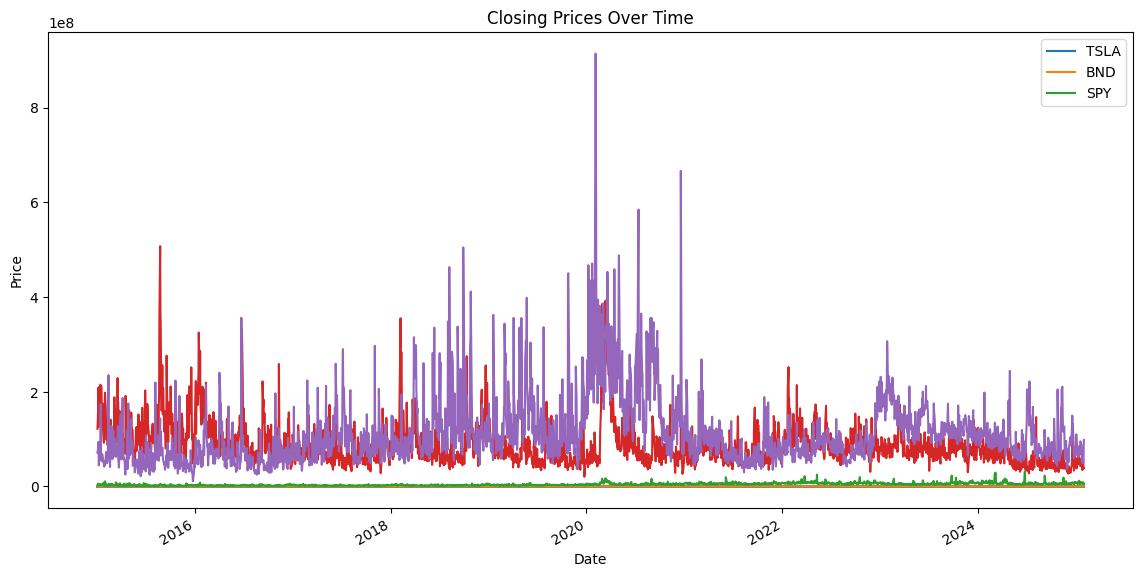

In [10]:
import matplotlib.pyplot as plt

data.plot(figsize=(14, 7))
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(tickers)
plt.show()

Calculate daily percentage change.

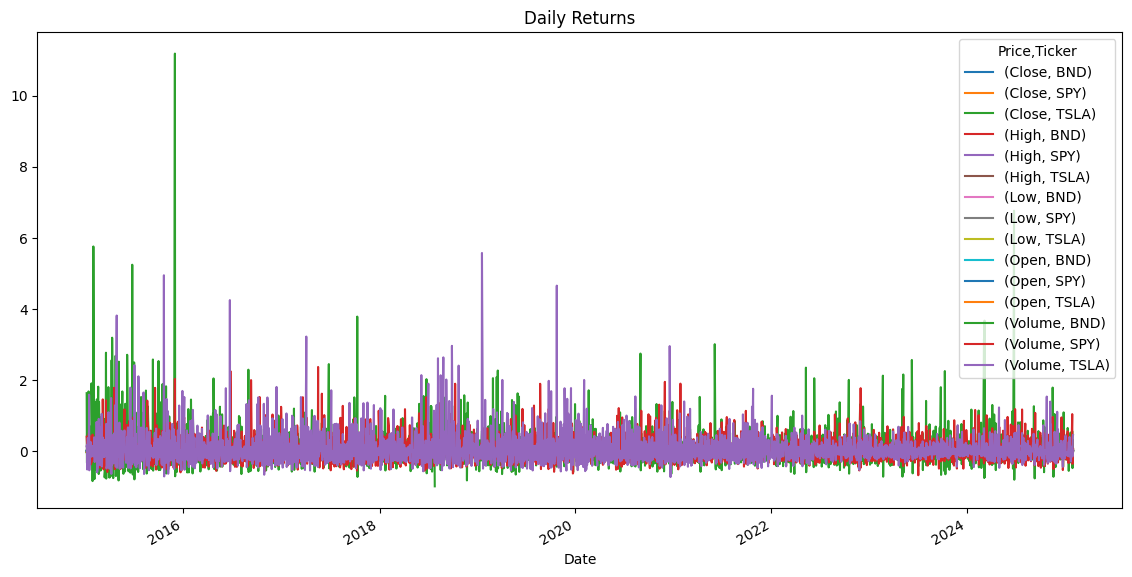

In [11]:
daily_returns = data.pct_change()
daily_returns.plot(figsize=(14, 7), title='Daily Returns')
plt.show()

Analyze volatility using rolling statistics.

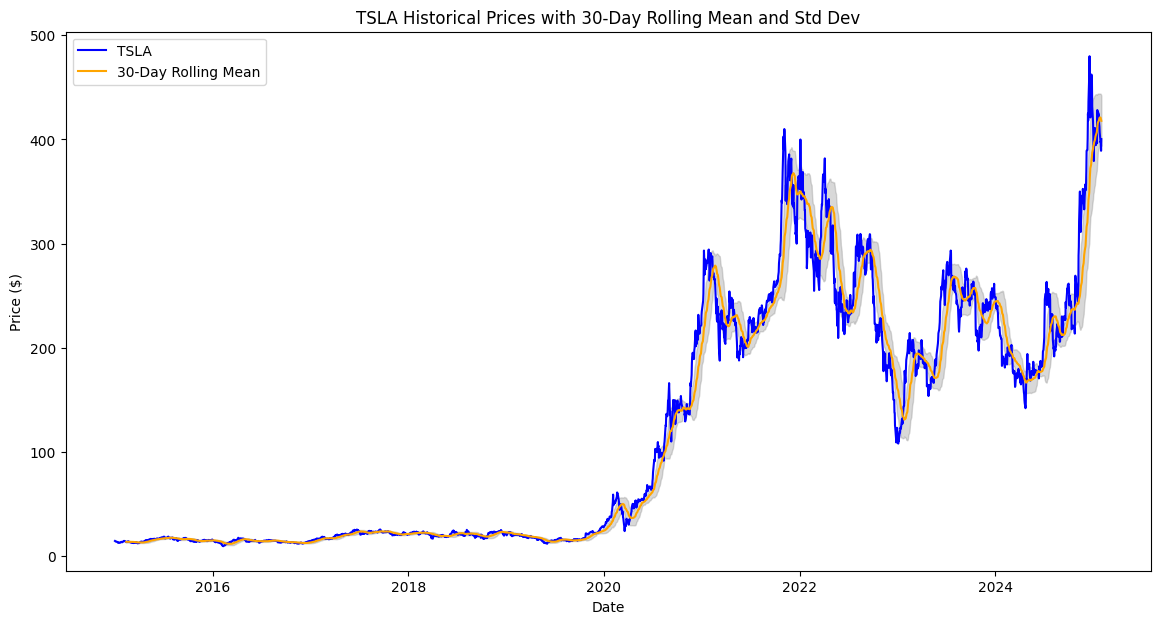

In [20]:
# Calculate rolling mean and standard deviation for TSLA Close price
rolling_mean = data['Close']['TSLA'].rolling(window=30).mean()
rolling_std = data['Close']['TSLA'].rolling(window=30).std()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data['Close']['TSLA'], label='TSLA', color='blue')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.fill_between(data.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='gray', alpha=0.3)

# Adding labels and title
plt.title('TSLA Historical Prices with 30-Day Rolling Mean and Std Dev')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Seasonality and Trends

Use decomposition to analyze trends.

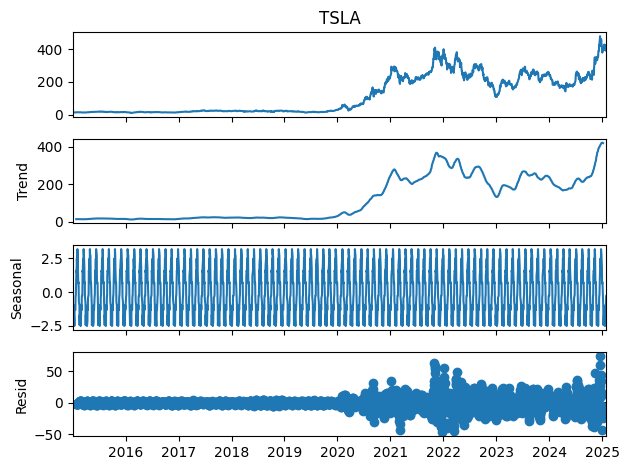

In [24]:
# Access TSLA's 'Close' price for seasonal decomposition
tsla_close = data['Close']['TSLA']

# Perform seasonal decomposition
decomposition = seasonal_decompose(tsla_close, model='additive', period=30)  # Adjust period as needed
decomposition.plot()
plt.show()

# Analyze Volatility

Calculate and document insights.

In [32]:
# Calculate daily returns for all tickers
daily_returns = data['Close'].pct_change()

# Access TSLA returns using MultiIndex
tsla_returns = daily_returns['TSLA']

# Calculate VaR and Sharpe Ratio for TSLA
VaR = tsla_returns.quantile(0.05)
sharpe_ratio = tsla_returns.mean() / tsla_returns.std()
# Output the results
print(f"Value at Risk (VaR) for TSLA: {VaR:.4f}")
print(f"Sharpe Ratio for TSLA: {sharpe_ratio:.4f}")

Value at Risk (VaR) for TSLA: -0.0514
Sharpe Ratio for TSLA: 0.0542
